In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("..")

cwd = os.getcwd()

In [3]:
input_folder = os.path.join(cwd, "input")

output_folder = os.path.join(cwd, "output")

figure_folder = os.path.join(cwd, "output", "figures")

In [4]:
# Set plot color (diverging)
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# create a 2-color diverging cmap (blue to almost white)
cmap_rgb = sns.diverging_palette(220, 20, n=10, as_cmap=False)

cmap_decreased  = cmap_rgb[len(cmap_rgb)//2:]

# single plot color
darkest_color = cmap(1.0)

In [5]:
tn_rows = pd.read_csv(f'{input_folder}\\tn_measurements.csv')

tp_rows = pd.read_csv(f'{input_folder}\\tp_measurements.csv')

In [6]:
tn_rows

,site_id,date,value,year,month,X,Y
0,lv_1,13-02-18,3.10,2018,2,6.322333e+06,433069.612446
1,lv_1,15-05-18,1.83,2018,5,6.322333e+06,433069.612446
2,lv_1,08-08-18,0.67,2018,8,6.322333e+06,433069.612446
3,lv_1,10-10-18,0.66,2018,10,6.322333e+06,433069.612446
4,lv_1,17-02-21,5.70,2021,2,6.322333e+06,433069.612446
...,...,...,...,...,...,...,...
14441,lt_669,07-02-18,0.72,2018,2,6.034027e+06,566380.053112
14442,lt_671,07-10-19,0.39,2019,10,6.112030e+06,482078.110350
14443,lt_671,25-07-19,0.60,2019,7,6.112030e+06,482078.110350
14444,lt_671,14-05-19,1.70,2019,5,6.112030e+06,482078.110350


In [7]:
tp_rows

,site_id,date,value,year,month,X,Y
0,lv_0,17-02-21,0.028,2021,2,6.323459e+06,426820.920797
1,lv_0,19-05-21,0.040,2021,5,6.323459e+06,426820.920797
2,lv_0,17-08-21,0.045,2021,8,6.323459e+06,426820.920797
3,lv_0,19-10-21,0.025,2021,10,6.323459e+06,426820.920797
4,lv_1,13-02-18,0.056,2018,2,6.322333e+06,433069.612446
...,...,...,...,...,...,...,...
14424,lt_669,07-02-18,0.103,2018,2,6.034027e+06,566380.053112
14425,lt_671,07-10-19,0.170,2019,10,6.112030e+06,482078.110350
14426,lt_671,25-07-19,0.046,2019,7,6.112030e+06,482078.110350
14427,lt_671,14-05-19,0.058,2019,5,6.112030e+06,482078.110350


## How many measurements per month each year?

In [8]:
# how many measurements in each year and month combination?

count_tn = tn_rows.groupby(['year', 'month'])['value'].count().reset_index()

count_tp = tp_rows.groupby(['year', 'month'])['value'].count().reset_index()

count_tn

,year,month,value
0,2017,1,112
1,2017,2,252
2,2017,3,104
3,2017,4,243
4,2017,5,168
...,...,...,...
79,2023,8,226
80,2023,9,186
81,2023,10,235
82,2023,11,113


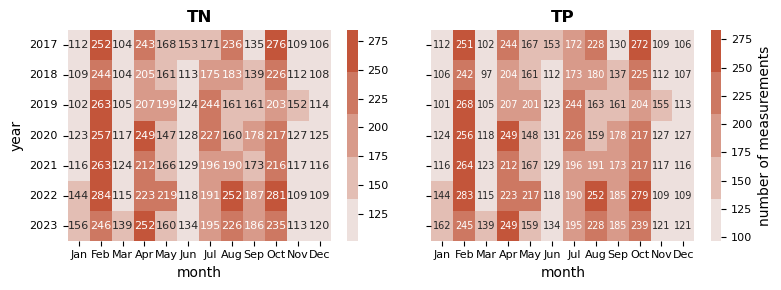

In [9]:
pivot1 = count_tn.pivot(index='year', columns='month', values='value')
pivot2 = count_tp.pivot(index='year', columns='month', values='value')

# Month labels (optional)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']



# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

# Heatmap 1
sns.heatmap(pivot1, annot=True, fmt="d", cmap=cmap_decreased,
            ax=axes[0], cbar_kws={'label': ' '}, annot_kws={'size': 8})
axes[0].set_title("TN", fontsize = 12, fontweight="bold")
axes[0].set_xlabel("month", fontsize = 10)
axes[0].set_ylabel("year", fontsize = 10)
axes[0].set_xticks([i + 0.5 for i in range(len(pivot1.columns))])
axes[0].set_xticklabels(month_labels,fontsize = 8)
axes[0].tick_params(axis='y', labelsize=8)


# Heatmap 2
sns.heatmap(pivot2, annot=True, fmt="d", cmap=cmap_decreased,
            ax=axes[1], cbar_kws={'label': 'number of measurements'}, annot_kws={'size': 7})
axes[1].set_title("TP",  fontsize = 12, fontweight="bold")
axes[1].set_xlabel("month", fontsize = 10)
axes[1].set_ylabel("",  fontsize = 10)
axes[1].set_xticks([i + 0.5 for i in range(len(pivot2.columns))])
axes[1].set_xticklabels(month_labels, fontsize = 8)
axes[1].tick_params(axis='y', labelsize=10)

for ax in axes:
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.label.set_size(10)
    cbar.ax.tick_params(labelsize=8) 


plt.tight_layout()
plt.savefig(f'{figure_folder}\\Figure_2.pdf', dpi=500)
plt.show()

## Compare values between countries

In [10]:
def calculate_period_mean(nutrient_rows, param):
    # Calculate the prediction target values (mean across the year)

    per_year_mean = nutrient_rows.groupby(['site_id', 'year'])['value'].mean().reset_index()
    
    period_mean = per_year_mean.groupby(['site_id'])['value'].mean().reset_index()
    
    if param == 'TP':
    
        period_mean["value"] = period_mean["value"].round(3)
        
    else:
        
        period_mean["value"] = period_mean["value"].round(2)
        
        
    coord_df =nutrient_rows[['site_id', 'X', 'Y']].drop_duplicates(subset='site_id')
    
    # add back the coordinates
    period_mean = period_mean.merge(coord_df, how='inner', on='site_id')
    
    return period_mean

In [11]:
tn_mean = calculate_period_mean(tn_rows, "TN")

tn_mean.to_csv(f'{input_folder}\\tn.csv', index=False)

tn_mean

,site_id,value,X,Y
0,ee_SJA0088000,1.39,6.460567e+06,536966.995615
1,ee_SJA0106000,5.28,6.499463e+06,611096.533002
2,ee_SJA0112000,1.27,6.443129e+06,585488.041664
3,ee_SJA0135000,4.47,6.565404e+06,582794.408882
4,ee_SJA0148000,1.90,6.472192e+06,529013.514162
...,...,...,...,...
888,lv_92,1.57,6.310550e+06,413147.668799
889,lv_94,1.70,6.319852e+06,416381.110931
890,lv_95,1.66,6.192672e+06,710175.286098
891,lv_97,1.09,6.380848e+06,372416.139786


In [12]:
tp_mean = calculate_period_mean(tp_rows, "TP")

tp_mean.to_csv(f'{input_folder}\\tp.csv', index = False)

tp_mean

,site_id,value,X,Y
0,ee_SJA0088000,0.050,6.460567e+06,536966.995615
1,ee_SJA0106000,0.021,6.499463e+06,611096.533002
2,ee_SJA0112000,0.036,6.443129e+06,585488.041664
3,ee_SJA0135000,0.028,6.565404e+06,582794.408882
4,ee_SJA0148000,0.050,6.472192e+06,529013.514162
...,...,...,...,...
888,lv_92,0.043,6.310550e+06,413147.668799
889,lv_94,0.026,6.319852e+06,416381.110931
890,lv_95,0.020,6.192672e+06,710175.286098
891,lv_97,0.043,6.380848e+06,372416.139786


## What is the skew of the prediction targets?

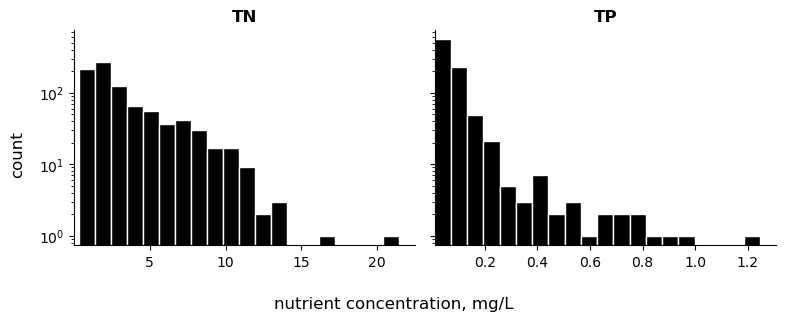

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3.2), sharey=True)

# First histogram
axes[0].hist(tn_mean['value'], color='black', edgecolor='white', bins=20)
axes[0].set_title('TN', fontsize=12, fontweight="bold")
axes[0].tick_params(labelsize=10)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_xlim(left=0.01)

# Second histogram
axes[1].hist(tp_mean['value'], color='black', edgecolor='white', bins=20)
axes[1].set_title('TP', fontsize=12, fontweight="bold")
axes[1].tick_params(labelsize=10)
axes[1].set_yscale('log')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_xlim(left=0.01)

fig.supxlabel('nutrient concentration, mg/L', fontsize=12)
fig.supylabel('count', fontsize=12)

#axes[0].set_xlim(left=0.01)
#axes[0].set_ylim(bottom=0.01)  

plt.tight_layout()
plt.savefig(f'{figure_folder}\\Figure_3.pdf', dpi=500)
plt.show()

## What are the aggregated and disaggregated data properties?

In [14]:
tn_rows['country'] = tn_rows['site_id'].apply(lambda x: x[0:2])

tp_rows['country'] = tp_rows['site_id'].apply(lambda x: x[0:2])

In [15]:
def create_year_table(rows):
    # Calculate entries per year and per country

    num_sites = rows.groupby(['country', 'year'])['site_id'].nunique().reset_index()

    num_sites.rename(columns={'site_id': 'unique_sites'}, inplace=True)
    
    num_obs = rows.groupby(['country', 'year']).size().reset_index()
    
    num_sites['unique_obs'] = num_obs[num_obs.columns[-1]]

    
    return num_sites

In [16]:
tn_years = create_year_table(tn_rows)

tp_years = create_year_table(tp_rows)

In [17]:
tn_years

,country,year,unique_sites,unique_obs
0,ee,2017,91,542
1,ee,2018,51,377
2,ee,2019,71,502
3,ee,2020,86,585
4,ee,2021,52,441
5,ee,2022,62,479
6,ee,2023,48,379
7,lt,2017,143,996
8,lt,2018,148,1004
9,lt,2019,168,1087


In [18]:
tn_years = tn_years.rename(columns={
    'unique_obs': 'TN observations',
    'unique_sites': 'TN sites'
})

tp_years = tp_years.rename(columns={
    'unique_obs': 'TP observations',
    'unique_sites': 'TP sites'
})

# Merge on country and year
combined = pd.merge(tn_years, tp_years, on=['country', 'year'], how='outer')


In [19]:
year_tab = combined.pivot_table(index='year', columns='country', values=['TN sites', 'TN observations', 'TP sites', 'TP observations'])

year_tab.fillna(0, inplace=True)

print(year_tab)

year_tab_l = year_tab.to_latex()

        TN observations                TN sites               TP observations  \
country              ee      lt     lv       ee     lt     lv              ee   
year                                                                            
2017              542.0   996.0  527.0     91.0  143.0   71.0           542.0   
2018              377.0  1004.0  498.0     51.0  148.0   63.0           377.0   
2019              502.0  1087.0  446.0     71.0  168.0   62.0           502.0   
2020              585.0  1051.0  419.0     86.0  157.0   48.0           589.0   
2021              441.0  1079.0  498.0     52.0  166.0   57.0           441.0   
2022              479.0  1088.0  665.0     62.0  168.0  109.0           479.0   
2023              379.0  1086.0  697.0     48.0  165.0   90.0           379.0   

                       TP sites                
country      lt     lv       ee     lt     lv  
year                                           
2017      988.0  516.0     91.0  143.0   70.0

In [20]:
year_tab_l.replace('\n', '').replace('\\\\', '\\').replace('000000', '').replace('.', '').replace('{r}', '{c}')

'\\begin{tabular}{lrrrrrrrrrrrr}\\toprule & \\multicolumn{3}{c}{TN observations} & \\multicolumn{3}{c}{TN sites} & \\multicolumn{3}{c}{TP observations} & \\multicolumn{3}{c}{TP sites} \\country & ee & lt & lv & ee & lt & lv & ee & lt & lv & ee & lt & lv \\year &  &  &  &  &  &  &  &  &  &  &  &  \\\\midrule2017 & 542 & 996 & 527 & 91 & 143 & 71 & 542 & 988 & 516 & 91 & 143 & 70 \\2018 & 377 & 1004 & 498 & 51 & 148 & 63 & 377 & 1003 & 476 & 51 & 148 & 63 \\2019 & 502 & 1087 & 446 & 71 & 168 & 62 & 502 & 1087 & 456 & 71 & 168 & 64 \\2020 & 585 & 1051 & 419 & 86 & 157 & 48 & 589 & 1047 & 424 & 87 & 157 & 48 \\2021 & 441 & 1079 & 498 & 52 & 166 & 57 & 441 & 1079 & 501 & 52 & 166 & 58 \\2022 & 479 & 1088 & 665 & 62 & 168 & 109 & 479 & 1080 & 665 & 62 & 167 & 109 \\2023 & 379 & 1086 & 697 & 48 & 165 & 90 & 379 & 1078 & 720 & 48 & 163 & 91 \\\\bottomrule\\end{tabular}'

In [21]:
def draw_table(data):
    
    countries = ['Total', 'Estonia', 'Latvia', 'Lithuania']
    
    parameters  = ['TN', 'TP']
    
    # Create MultiIndex from country and parameter
    columns = pd.MultiIndex.from_product([countries, parameters])
    
    df = pd.DataFrame(data, columns=columns)
    
    df.index = ['No. of sites', 'No. of observations', 'Min', 'Median', 'Mean', 'Max']
    
    print(df)
    
    return df.to_latex()

In [22]:
def calc_number_of_sites(df1, df2):
    
    lst = []
    
    for df in [df1, df2]:
        
        sites_total = len(df['site_id'].unique())
        
        lst.append(int(sites_total))
    
    
    for country in ['ee', 'lv', 'lt']:
        
        for df in [df1, df2]:
            
            sites = df[df['site_id'].str.contains(country)]['site_id'].unique()
            
            lst.append(int(len(sites)))
    
    array = np.array(lst, dtype=int)
    
    return array

In [23]:
def calc_number_of_observations(df1, df2):
    
    lst = []
    
    for df in [df1, df2]:
        
        total_obs = len(df)
        
        lst.append(int(total_obs))
    
    
    for country in ['ee', 'lv', 'lt']:
        
        for df in [df1, df2]:
            
            country_rows = df[df['site_id'].str.contains(country)]
            
            lst.append(int(len(country_rows)))
            
    
    array = np.array(lst, dtype=int)
    
    return array

In [24]:
def calc_stats(df1, df2):
    
    mins = []
    
    medians = []
    
    means = []
    
    maxes = []
    
    # total data
    for df in [df1, df2]:
        
        total_min, total_median, total_mean, total_max = df['value'].min(), round(df['value'].median(),2), round(df['value'].mean(),2), df['value'].max()
        
        mins.append(total_min)
        
        medians.append(total_median)
        
        means.append(total_mean)
        
        maxes.append(total_max)

    # per country
    for country in 'ee_', 'lv_', 'lt_':
        
        for df in [df1, df2]:
        
            country_rows = df[df['site_id'].str.contains(country)]

            min_, median_, mean_, max_  = country_rows['value'].min(), round(country_rows['value'].median(),2), round(country_rows['value'].mean(), 2), country_rows['value'].max()

            mins.append(min_)
            
            medians.append(median_)
            
            means.append(mean_)

            maxes.append(max_)
        
   # create arrays     
    min_array = np.array(mins)
    
    median_array = np.array(medians)
    
    mean_array = np.array(means)
    
    max_array = np.array(maxes)
    
    return min_array, median_array, mean_array, max_array

In [25]:
# calculate row values
row1 = calc_number_of_sites(tn_rows, tp_rows)

row2 = calc_number_of_observations(tn_rows, tp_rows)

row3, row4, row5, row6 = calc_stats(tn_rows, tp_rows)

In [26]:
# draw the table
array_full = np.vstack([row1, row2, row3, row4, row5, row6])

stats_l = draw_table(array_full)

stats_l

                        Total              Estonia             Latvia  \
                           TN          TP       TN        TP       TN   
No. of sites           893.00    893.0000   169.00   169.000   242.00   
No. of observations  14446.00  14429.0000  3305.00  3309.000  3750.00   
Min                      0.05      0.0033     0.17     0.004     0.25   
Median                   1.80      0.0500     2.00     0.040     1.50   
Mean                     3.25      0.0800     2.60     0.050     2.85   
Max                     44.20      5.3700    14.72     0.430    32.00   

                               Lithuania            
                            TP        TN        TP  
No. of sites          242.0000    482.00   482.000  
No. of observations  3758.0000   7391.00  7362.000  
Min                     0.0033      0.05     0.007  
Median                  0.0400      1.90     0.060  
Mean                    0.0500      3.74     0.110  
Max                     0.7300     44.20    

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n & \\multicolumn{2}{r}{Total} & \\multicolumn{2}{r}{Estonia} & \\multicolumn{2}{r}{Latvia} & \\multicolumn{2}{r}{Lithuania} \\\\\n & TN & TP & TN & TP & TN & TP & TN & TP \\\\\n\\midrule\nNo. of sites & 893.000000 & 893.000000 & 169.000000 & 169.000000 & 242.000000 & 242.000000 & 482.000000 & 482.000000 \\\\\nNo. of observations & 14446.000000 & 14429.000000 & 3305.000000 & 3309.000000 & 3750.000000 & 3758.000000 & 7391.000000 & 7362.000000 \\\\\nMin & 0.050000 & 0.003300 & 0.170000 & 0.004000 & 0.250000 & 0.003300 & 0.050000 & 0.007000 \\\\\nMedian & 1.800000 & 0.050000 & 2.000000 & 0.040000 & 1.500000 & 0.040000 & 1.900000 & 0.060000 \\\\\nMean & 3.250000 & 0.080000 & 2.600000 & 0.050000 & 2.850000 & 0.050000 & 3.740000 & 0.110000 \\\\\nMax & 44.200000 & 5.370000 & 14.720000 & 0.430000 & 32.000000 & 0.730000 & 44.200000 & 5.370000 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [27]:
stats_l.replace('\n', '').replace('\\\\', '\\')

'\\begin{tabular}{lrrrrrrrr}\\toprule & \\multicolumn{2}{r}{Total} & \\multicolumn{2}{r}{Estonia} & \\multicolumn{2}{r}{Latvia} & \\multicolumn{2}{r}{Lithuania} \\ & TN & TP & TN & TP & TN & TP & TN & TP \\\\midruleNo. of sites & 893.000000 & 893.000000 & 169.000000 & 169.000000 & 242.000000 & 242.000000 & 482.000000 & 482.000000 \\No. of observations & 14446.000000 & 14429.000000 & 3305.000000 & 3309.000000 & 3750.000000 & 3758.000000 & 7391.000000 & 7362.000000 \\Min & 0.050000 & 0.003300 & 0.170000 & 0.004000 & 0.250000 & 0.003300 & 0.050000 & 0.007000 \\Median & 1.800000 & 0.050000 & 2.000000 & 0.040000 & 1.500000 & 0.040000 & 1.900000 & 0.060000 \\Mean & 3.250000 & 0.080000 & 2.600000 & 0.050000 & 2.850000 & 0.050000 & 3.740000 & 0.110000 \\Max & 44.200000 & 5.370000 & 14.720000 & 0.430000 & 32.000000 & 0.730000 & 44.200000 & 5.370000 \\\\bottomrule\\end{tabular}'